In [1]:
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Timbur
[nltk_data]     Dinu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Timbur
[nltk_data]     Dinu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
post = pandas.read_csv("mbti_1.csv")
post

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [3]:
#Analizam tipul de date
post.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'I dunno, I just want to write some crazy stor..."
freq,1832,1


In [4]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
#curatirea textului postarilor de simboluri
import re
for item in range(len(post['posts'])):
    post['posts'][item] = re.sub(r'[^\w\ \|\|\|]', '', post['posts'][item])

In [6]:
post['posts'] = post['posts'].apply(word_tokenize)

In [7]:
#convertesc tot textul postarilor in litere mici
for i in range(len(post['posts'])):
    post['posts'][i] = post['posts'][i].lower()
post

,type,posts
0,INFJ,httpwwwyoutubecomwatchvqsxhcwe3krw|||http41med...
1,ENTP,im finding the lack of me in these posts very ...
2,INTP,good one _____ httpswwwyoutubecomwatchvfhig...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,youre fired|||thats another silly misconceptio...
...,...,...
8670,ISFP,httpswwwyoutubecomwatchvt8edhb_h908|||ixfp jus...
8671,ENFP,soif this thread already exists someplace else...
8672,INTP,so many questions when i do these things i wo...
8673,INFP,i am very conflicted right now when it comes t...


In [9]:
df = pandas.DataFrame(columns = ['type', 'posts'])
for i in range(len(post['posts'])):
    a = post['posts'][i].split('|||')
    for j in a:
        df = df.append({'type': post['type'][i], 'posts': j}, ignore_index = True)
df.head(10)

,type,posts
0,INFJ,httpwwwyoutubecomwatchvqsxhcwe3krw
1,INFJ,http41mediatumblrcomtumblr_lfouy03pma1qa1rooo1...
2,INFJ,enfp and intj moments httpswwwyoutubecomwatch...
3,INFJ,what has been the most lifechanging experience...
4,INFJ,httpwwwyoutubecomwatchvvxzeywwrdw8 httpwwwyo...
5,INFJ,may the perc experience immerse you
6,INFJ,the last thing my infj friend posted on his fa...
7,INFJ,hello enfj7 sorry to hear of your distress its...
8,INFJ,84389 84390 httpwallpaperpassioncomupload237...
9,INFJ,welcome and stuff


c:\users\timbur dinu\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


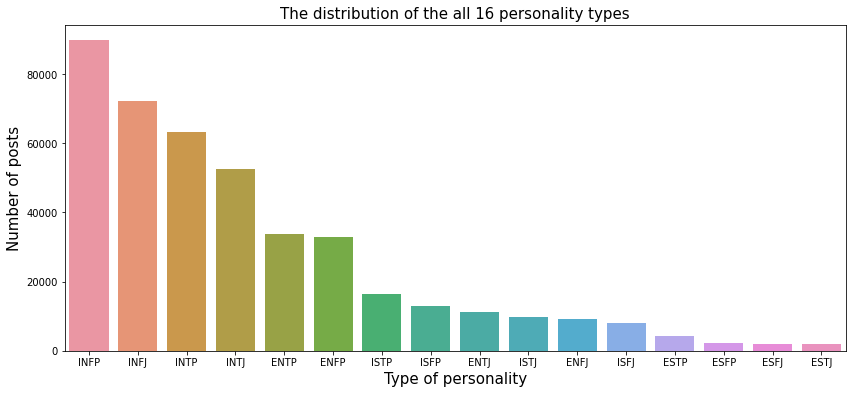

In [12]:
plt.figure(figsize = (14,6))
count = new['type'].value_counts()
sns.barplot(count.index, count.values, alpha = 1)
plt.title('The distribution of the all 16 personality types', size = 15)
plt.xlabel('Type of personality', size = 15)
plt.ylabel('Number of posts', size = 15)
plt.show()

In [14]:
#split posts by letter 
new_df = pandas.DataFrame( columns = ['type', 'posts'])
for i in range(len(df.values)):
    for j in list(df.values[i][0]):
        new_df = new_df.append({'type': j, 'posts': df.values[i][1]}, ignore_index = True)
new_df.head(10)

,type,posts
0,I,httpwwwyoutubecomwatchvqsxhcwe3krw
1,N,httpwwwyoutubecomwatchvqsxhcwe3krw
2,F,httpwwwyoutubecomwatchvqsxhcwe3krw
3,J,httpwwwyoutubecomwatchvqsxhcwe3krw
4,I,http41mediatumblrcomtumblr_lfouy03pma1qa1rooo...
5,N,http41mediatumblrcomtumblr_lfouy03pma1qa1rooo...
6,F,http41mediatumblrcomtumblr_lfouy03pma1qa1rooo...
7,J,http41mediatumblrcomtumblr_lfouy03pma1qa1rooo...
8,I,enfp and intj moments httpswwwyoutubecomwatc...
9,N,enfp and intj moments httpswwwyoutubecomwatc...


c:\users\timbur dinu\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


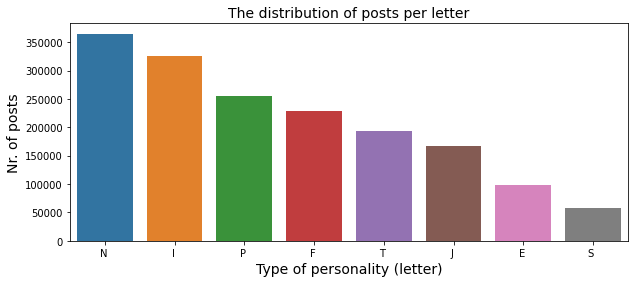

In [17]:
cnt_srs = new_df['type'].value_counts()
plt.figure(figsize = (10,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 1)
plt.title('The distribution of posts per letter', size = 14)
plt.xlabel('Type of personality (letter)', size = 14)
plt.ylabel('Nr. of posts', size = 14)
plt.show()

In [19]:
stop_w = stopwords.words('english')
new_df['post'] = new_df['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_w)]))

In [23]:
def freq(text, col, quantity, title):
    all_words = ' '.join([text for text in text[col]])
    token_phrase = tokenize.WhitespaceTokenizer().tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pandas.DataFrame({'Word': list(frequency.keys()),
                                   'Frequency': list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = 'Frequency', n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = 'Word', y = 'Frequency', color = 'fuchsia')
    plt.title(title)
    plt.show()

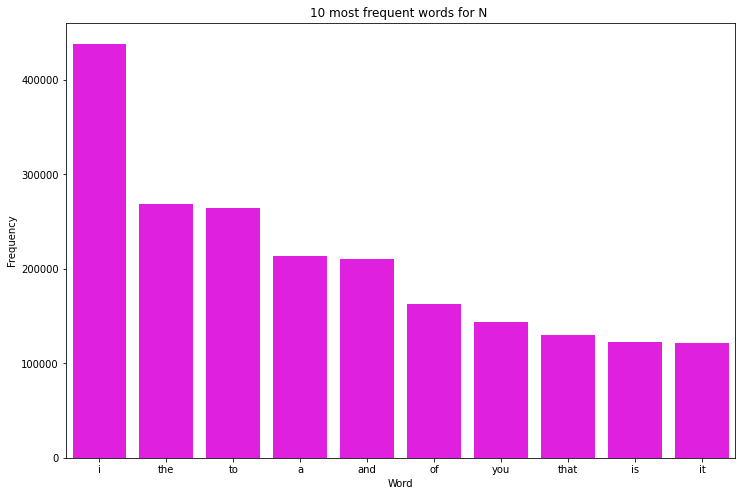

In [24]:
freq(new_df2[new_df2['type'].str.contains('N')], 'posts', 10, '10 most frequent words for N ')
#analog se face pentru celelate litere